# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../traffic-signs-data/train.p"
validation_file= "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Training inputs: ",X_train.shape)
print("Validation inputs: ",X_valid.shape)

Training inputs:  (34799, 32, 32, 3)
Validation inputs:  (4410, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

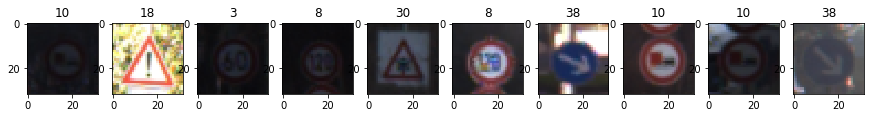

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

        
def visualize_images(imgs, color=""):
    fig = plt.figure()
    i=1
    if color == "gray":
        for img in imgs:
            ax = fig.add_subplot(1,len(imgs),i)
            i=i+1
            ax.imshow(img, cmap="gray")
    else:
        for img in imgs:
            ax = fig.add_subplot(1,len(imgs),i)
            i=i+1
            ax.imshow(img)
    
# Visualize 6 different images randomly
def visualize_random(num, arr4DImgFeature, arrTrainLabel, color='None'):
    fig = plt.figure(figsize=(15, 15))
    num_plot=num
    for i in range(num_plot):
        index = random.randint(0, len(arr4DImgFeature))
        image = arr4DImgFeature[index].squeeze()

        ax=fig.add_subplot(1,num_plot,i+1, )
        ax.set_title(str(arrTrainLabel[index]))
        if (color == "gray"):
            ax.imshow(image, cmap="gray")
        else:
            ax.imshow(image)
        
visualize_random(10,X_train, y_train)


### Exploratory of the training datasets

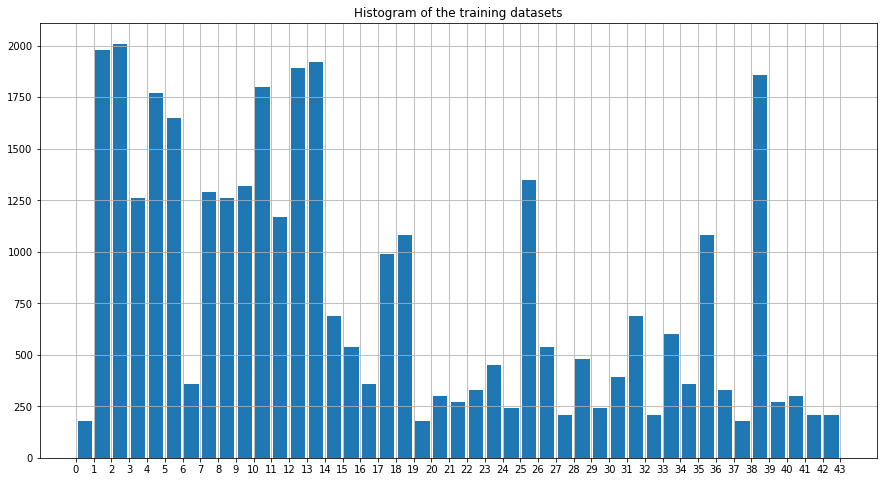

In [6]:
# Analyzing the training datasets

def show_histogram(data):
    fig_hist = plt.figure(figsize=(15, 8))
    ax = fig_hist.add_subplot(111)
    ax.hist(data,range(n_classes+1),rwidth=0.8, align="mid")
    ax.set_xticks(range(44))
    ax.grid(True)
    ax.set_title("Histogram of the training datasets")
    plt.show()

show_histogram(y_train)

From the above histogram, we can see that several labels are under-sampled. Thus, we need to add more images as our training dataset. We can do it by some image transformations.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

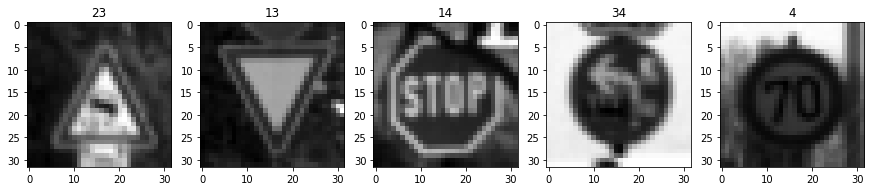

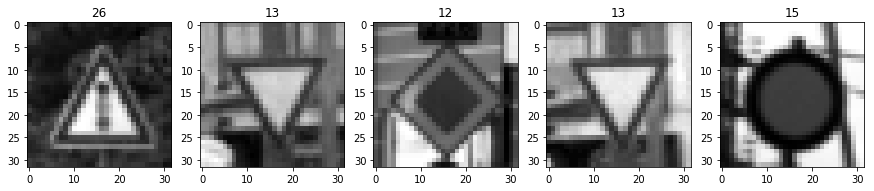

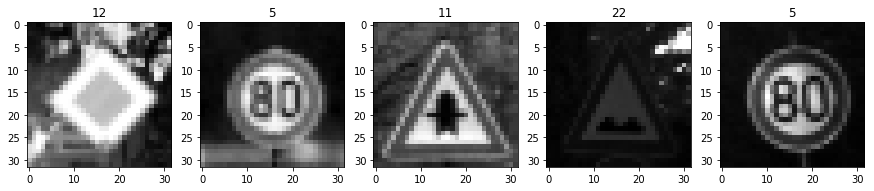

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2

def normalize_gray(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

## Conduct the preprocessing


# Convert to gray by summing RGB and divided by 3
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

#Normalized
X_train_gray_norm = (X_train_gray - 128)/128 
X_valid_gray_norm = (X_valid_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128 
#for i in range(len(X_train)):
#    gray_img = rgb2gray_luma(X_train[i])
#    X_train_gray.append(normalize_gray(gray_img))

#for i in range(len(X_valid)):
#    gray_img = rgb2gray_luma(X_valid[i])
#    X_valid_gray.append(normalize_gray(gray_img))
    
#for i in range(len(X_test)):
#    gray_img = rgb2gray_luma(X_test[i])
#    X_test_gray.append(normalize_gray(gray_img))
    
visualize_random(5,X_train_gray_norm, y_train, "gray")
visualize_random(5,X_valid_gray_norm, y_valid, "gray")
visualize_random(5,X_test_gray_norm, y_test, "gray")

### Adding more new images for training dataset which label are under 500 samples

test shape:  (32, 32, 1)
label 0 occurs 180 times
label 6 occurs 360 times
label 16 occurs 360 times
label 19 occurs 180 times
label 20 occurs 300 times
label 21 occurs 270 times
label 22 occurs 330 times
label 23 occurs 450 times
label 24 occurs 240 times
label 27 occurs 210 times
label 29 occurs 240 times
label 30 occurs 390 times
label 32 occurs 210 times
label 34 occurs 360 times
label 36 occurs 330 times
label 37 occurs 180 times
label 39 occurs 270 times
label 40 occurs 300 times
label 41 occurs 210 times
label 42 occurs 210 times


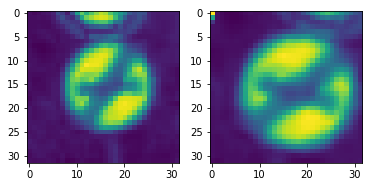

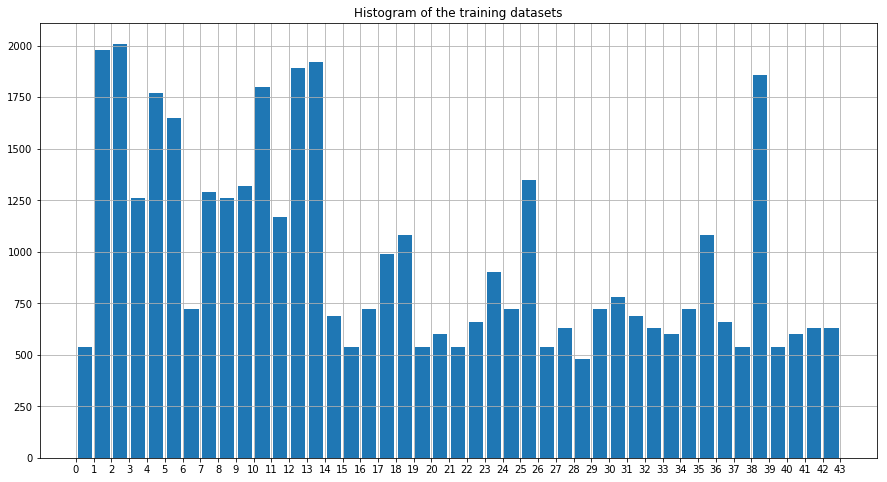

In [8]:
# Adding more training datasets which is undersampled
def duplicate_img_by_rotation(img, deg=None):
    if deg is None:
        deg = np.random.randint(-30,30)
        if abs(deg) < 15: #avoid small change of rotation due to overfitting
            deg = deg*2
    res_img = np.zeros((image_shape[0],image_shape[1],1))
    #enlarge the image before rotating to avoid black border after rotation
    resized_img = cv2.resize(img,None,fx=1.3, fy=1.3, interpolation = cv2.INTER_CUBIC)
    new_rows, new_cols = resized_img.shape
    M = cv2.getRotationMatrix2D((new_cols/2,new_rows/2),deg,1)
    rotated_img = cv2.warpAffine(resized_img,M,(new_cols,new_rows))
    #Translation
    x_trans = (image_shape[0] - new_rows)/2.5
    y_trans = (image_shape[1] - new_cols)/2.5
    M = np.float32([[1,0,x_trans],[0,1,y_trans]])
    res_img[:,:,0] = cv2.warpAffine(rotated_img, M,(image_shape[1],image_shape[0]))
    return res_img

#Preview rotation image test
test = duplicate_img_by_rotation(X_train_gray_norm[1], -20)
print ("test shape: ",test.shape)
visualize_images([X_train_gray_norm[1].squeeze(),test.squeeze()], "gray")

X_train_new_imgs = np.copy(X_train_gray_norm)
y_train_new_imgs = np.copy(y_train)
threshold = 470

for i in range(n_classes):
    occur = np.count_nonzero(y_train == i)
    if occur < threshold:
        print("label %d occurs %d times" % (i,occur))
        #get all the index location of the label image
        found_indices = np.where(y_train == i)[0]
        print("generating more images for this label...")
        for idx in found_indices:
            newimg=duplicate_img_by_rotation(X_train_gray_norm[idx])
            X_train_new_imgs= np.concatenate((X_train_new_imgs, [newimg]), axis=0)
            y_train_new_imgs= np.concatenate( (y_train_new_imgs, [i]), axis=0)
            if occur <250: # make 2x more images if the occurence is under 250 samples
                newimg=duplicate_img_by_rotation(X_train_gray_norm[idx])
                X_train_new_imgs= np.concatenate((X_train_new_imgs, [newimg]), axis=0)
                y_train_new_imgs= np.concatenate( (y_train_new_imgs, [i]), axis=0)
                
show_histogram(y_train_new_imgs)


In [ ]:
#save the images and label
newtrain = {"features":[], "labels":[]}
newtrain['features'] = X_train_new_imgs
newtrain['labels'] = y_train_new_imgs
pickle.dump( newtrain, open( "newtrain.p", "wb" ) )

# Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Using LeNet Architecture taken from the lecture's solution
# However, some parameters are adapted
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. 6 Filter of 5x5x1 Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = number of classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
# one hot clasification based on the number of the classes
one_hot_y = tf.one_hot(y, n_classes)

#Training Pipeline
rate = 0.0007

logits = LeNet(x)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#Model Training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray_norm, y_train = shuffle(X_train_gray_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_gray_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.668

EPOCH 2 ...
Validation Accuracy = 0.783

EPOCH 3 ...
Validation Accuracy = 0.806

EPOCH 4 ...
Validation Accuracy = 0.838

EPOCH 5 ...
Validation Accuracy = 0.846

EPOCH 6 ...
Validation Accuracy = 0.876

EPOCH 7 ...
Validation Accuracy = 0.868

EPOCH 8 ...
Validation Accuracy = 0.888

EPOCH 9 ...
Validation Accuracy = 0.883

EPOCH 10 ...
Validation Accuracy = 0.890

EPOCH 11 ...
Validation Accuracy = 0.898

EPOCH 12 ...
Validation Accuracy = 0.897

EPOCH 13 ...
Validation Accuracy = 0.902

EPOCH 14 ...
Validation Accuracy = 0.893

EPOCH 15 ...
Validation Accuracy = 0.906

EPOCH 16 ...
Validation Accuracy = 0.897

EPOCH 17 ...
Validation Accuracy = 0.917

EPOCH 18 ...
Validation Accuracy = 0.896

EPOCH 19 ...
Validation Accuracy = 0.904

EPOCH 20 ...
Validation Accuracy = 0.917

EPOCH 21 ...
Validation Accuracy = 0.899

EPOCH 22 ...
Validation Accuracy = 0.911

EPOCH 23 ...
Validation Accuracy = 0.913

EPOCH 24 ...
Validation Accura

# Test model

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [1]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
web_images=[]

for file in os.listdir("./imgs_from_web/"):
    if file.endswith("sign.jpg"):
        print(file)
        gray_img = np.zeros((image_shape[0],image_shape[1],1))
        gray_img[:,:,0] = cv2.imread("./imgs_from_web/"+file,0)
        web_images.append(gray_img)
        print(gray_img.shape)

fig= plt.figure()
i=1
for img in web_images:
    ax=fig.add_subplot(1,5,i)
    i=i+1
    ax.imshow(img[:,:,0], cmap="gray")
web_images= np.asarray(web_images)
#my_images_gry = np.sum(web_images/3, axis=3, keepdims=True)

#gray_norm = (my_images_gry - 128)/128 
print(web_images.shape)
#for img in web_images:
#    gray = (img[:,:,0]+img[:,:,1]+img[:,:,2])/3
#    web_images_gray_norm.append((gray-128)/128)

2sign.jpg


NameError: name 'np' is not defined

### Predict the Sign Type for Each Image

In [47]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

web_labels=[ 17, 18, 25, 31]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    web_saver = tf.train.import_meta_graph('./lenet.meta')
    web_saver.restore(sess, "./lenet")
    web_accuracy = evaluate(web_images, web_labels)
    print("Test Set Accuracy = {:.3f}".format(web_accuracy))

Test Set Accuracy = 1.000


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 